# Homework 2
## CAP 5610 - Machine Learning
## Suma Marri
## February 20, 2022

### Problem 1: Evaluate Machine Learning Algorithms
In this problem, we want to use some statistical techniques we learned in class to estimate the performance of several machine learning algorithms. Use the data from homework 1. You can download the zip file for Homework 1, which contains the generated data set for this assignment and load the data into Python.

In [1]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# read and load the csv data file
filename = "Dataset/myClassDataSet2.csv"
data_df = read_csv (filename)

In [2]:
data_df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,class
0,-1.160092,-0.359014,0.672250,-0.298393,-0.940342,0.973444,1.152316,1.268438,1.666694,-0.797019,0
1,-1.065337,0.949971,0.775982,-0.436214,0.642434,-0.808253,1.060199,-0.055959,0.213937,-2.429849,0
2,0.860180,-0.100933,-1.322137,1.063376,-0.411552,-1.806852,-0.864811,-1.303068,-0.296465,-0.622150,1
3,-0.894969,0.568466,1.961494,-1.705388,-0.319602,0.306074,0.907182,0.203818,-0.285203,-1.200104,0
4,-0.703499,3.091785,0.669167,-0.448310,0.826840,0.774514,0.702085,-2.426947,-0.596632,0.945176,0


In [3]:
Y = data_df.values[:,-1]
X = data_df.values[:,0:-1]

#### Part A
Use RepeatedKFold class with ‘random state=2’ to perform a repeated 10-fold cross-validation on the data with three repeats; Then, evaluates a logistic regression model with ‘liblinear’ solver and report the mean classification accuracy.

In [4]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2)
# 'liblinear'
model = LogisticRegression(solver='liblinear').fit(X, Y)
model.score(X, Y)

0.9413

#### Part B
Use the cross val score function to report ‘accuracy’, ‘neg log loss’, ‘roc auc’; explain what the results suggest (how you interpret the results).

In [5]:
accuracy_results = cross_val_score(model, X, Y, scoring='accuracy')
accuracy_results1 = cross_val_score(model, X, Y, scoring='accuracy', cv = rkf)

print("Accuracy: {}".format(accuracy_results.mean()))
print("Accuracy with Cross-Validation: {}".format(accuracy_results1.mean()))

Accuracy: 0.9407
Accuracy with Cross-Validation: 0.9408


In [6]:
neglogloss_results = cross_val_score(model, X, Y, scoring='neg_log_loss')
neglogloss_results1 = cross_val_score(model, X, Y, scoring='neg_log_loss', cv = rkf)
print("Neg Log Loss: {}".format(neglogloss_results.mean()))
print("NegLogLoss with Cross-Validation: {}".format(neglogloss_results1.mean()))

Neg Log Loss: -0.1971374909381874
NegLogLoss with Cross-Validation: -0.19668541610095522


In [7]:
roc_results = cross_val_score(model, X, Y, scoring='roc_auc')
roc_results1 = cross_val_score(model, X, Y, scoring='roc_auc', cv = rkf)
print("ROC Area under Curve: {}".format(roc_results.mean()))
print("ROC AUC with Cross-Validation: {}".format(roc_results1.mean()))

ROC Area under Curve: 0.9675847984427653
ROC AUC with Cross-Validation: 0.9676202218997184


Accuracy - Accuracy is measured based on how many observastions were correctly classified. The higher the number, the better. It is great to use because it considers all the points.
Neg_log_loss - The score is negative -- the lower the score, the better the performance and better predictions. Log Loss is the negative average of the log of corrected predicted probabilities for each instance.
ROC AUC - The ROC AUC is really good, considering it is between 0.9 and 1, which means the performance of the model can easily be distinguishing between the positive and negative classes.

#### Part C
Using 10-fold cross-validation (KFold with ‘random state = 7’) spot-check 2 linear algorithms LinearDiscriminantAnalysis, LogisticRegression (with ‘liblinear’ solver); and 3 nonlinear algorithms KNeighborsClassifier, GaussianNB, and SVC

In [8]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [9]:
# prepare models
models = []
models.append(('LD' , LinearDiscriminantAnalysis()))
models.append(('LR' , LogisticRegression()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVC' , SVC()))

In [10]:
# evaluate each model in turn
acc_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  acc_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print("{} mean Accuracy: {}".format(name, cv_results.mean()))

LD mean Accuracy: 0.9322000000000001
LR mean Accuracy: 0.9408
KNN mean Accuracy: 0.9363000000000001
NB mean Accuracy: 0.9415999999999999
SVC mean Accuracy: 0.9446


In [11]:
# evaluate each model in turn
nll_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_log_loss')
  nll_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print("{} mean Neg Log Loss:{}".format(name, cv_results.mean(), cv_results.std()))

LD mean Neg Log Loss:-0.2295952703473972
LR mean Neg Log Loss:-0.19663330595420608
KNN mean Neg Log Loss:-0.6486067973361892
NB mean Neg Log Loss:-0.2122914636501954


C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 666, in predict_proba
    se

C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 666, in predict_proba
    se

SVC mean Neg Log Loss:nan


C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 666, in predict_proba
    se

In [12]:
# evaluate each model in turn
roc_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
  roc_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print("{} mean ROC AUC: {}".format(name, cv_results.mean(), cv_results.std()))

LD mean ROC AUC: 0.9632664679954198
LR mean ROC AUC: 0.967617761487993
KNN mean ROC AUC: 0.9667506065449665
NB mean ROC AUC: 0.9728120193590408
SVC mean ROC AUC: 0.9802485589201508


#### Part D 
Use box and whisker plots to compare the accuracy of the models you created in part (c). 

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

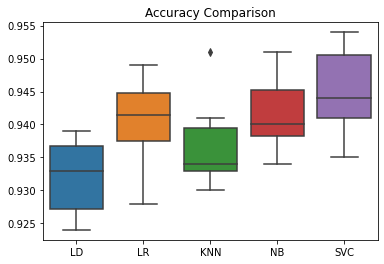

In [14]:
fig = plt.figure()
g = fig.add_subplot(111)
sns.boxplot(data=acc_results).set(title='Accuracy Comparison')
g.set_xticklabels(names)
plt.show()

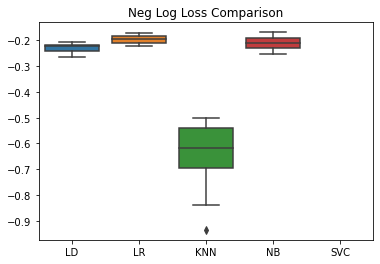

In [15]:
fig = plt.figure()
g = fig.add_subplot(111)
sns.boxplot(data=nll_results).set(title='Neg Log Loss Comparison')
g.set_xticklabels(names)
plt.show()

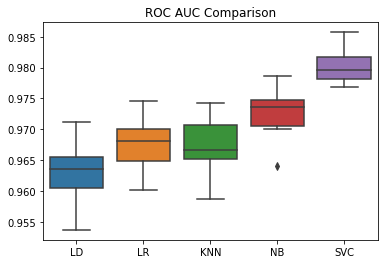

In [16]:
fig = plt.figure()
g = fig.add_subplot(111)
sns.boxplot(data=roc_results).set(title='ROC AUC Comparison')
g.set_xticklabels(names)
plt.show()

### Problem 2: Automate Machine Learning Workfows with Pipeline (12 points)
In this problem, you will continue to use the dataset from problem 1. You will Pipeline utilities in Python scikit-learn to automate standard applied machine learning workflows.

In [17]:
# import necessary packages to the Jupyter notebook
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# read and load the csv data file
filename = "Dataset/myClassDataSet2.csv"
dataframe = read_csv(filename)
array = dataframe.values

# separate array into input and output components
#X = array [:,0:8]
#Y = array [:,8]
Y = array[:,-1]
X = array[:,0:-1]

#### Part A
Define a 5-step pipeline with the following steps; and perform a k-fold cross validation using KFold with ‘random state =5’ (2 points), and provide a summary of accuracy of the setup on the dataset.

i. Standardize the data using StandardScaler().

In [18]:
# we create a Python list of steps that are provided to the pipeline for processing the data. 
estimators = []
estimators.append(('stan', StandardScaler()))
estimators.append(('LR', LogisticRegression()))

ii. Extract 3 features with Principal Component Analysis using PCA().

In [19]:
PCA(n_components=3).fit_transform(X,Y)

array([[ 1.8625981 , -0.42704185, -0.63879609],
       [ 1.89391396, -0.1430395 ,  0.41658238],
       [-1.83764137, -0.15681797,  1.33471962],
       ...,
       [-1.3941512 ,  4.27858863, -0.21210739],
       [ 0.19593467, -1.36620485, -0.00786667],
       [-2.78141989, -0.13455338, -0.67470072]])

iii. Extract 6 features with statistical selection using SelectKBest().

In [20]:
SelectKBest(k=6).fit_transform(X,Y)

array([[ 0.67225028, -0.29839349, -0.94034159,  0.97344436,  1.15231573,
         1.26843767],
       [ 0.77598225, -0.43621402,  0.64243362, -0.80825303,  1.06019861,
        -0.05595928],
       [-1.32213724,  1.06337624, -0.41155161, -1.80685208, -0.86481126,
        -1.30306815],
       ...,
       [ 0.83959238, -1.78600037,  1.80905237, -1.52954371, -2.71759927,
         0.29429998],
       [-0.67474064,  0.9431257 , -1.63823094,  0.43790922,  0.73639503,
         0.25025146],
       [-1.82403541,  1.4073789 ,  1.10738528,  0.22372376, -1.36859049,
        -0.42302995]])

iv. Combine features, extracted from two previous steps using FeatureUnion().

In [21]:
features = []
features.append(( 'pca' , PCA(n_components=3)))
features.append(( 'select_best' , SelectKBest(k=6)))
feature_union = FeatureUnion(features)
feature_union

FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                               ('select_best', SelectKBest(k=6))])

v. Learn a Logistic Regression using LogisticRegression with ‘liblinear’ solver.

In [22]:
# create pipeline
estimators = []
estimators.append(( 'feature_union' , feature_union))
estimators.append(( 'logistic' , LogisticRegression()))
pipeline_model = Pipeline(estimators)

In [23]:
# evaluate pipeline
kfold = KFold(random_state=5, shuffle=True)

In [24]:
results = cross_val_score(pipeline_model, X, Y, cv=kfold)
print(results.mean())

0.9401999999999999


### Problem 3
Improve Performance with Ensembles (13 points)
In this problem, you will continue to use the dataset from problem 1. You will create ensembles in
Python using scikit-learn to improve the performance of models on your problems. For each ensemble
algorithm use 10-fold cross-validation using KFold ; and the classification accuracy performance
metric to report the reuslts.

In [25]:
# import necessary packages to the Jupyter notebook
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn . model_selection import KFold
from sklearn . model_selection import cross_val_score
from sklearn . ensemble import BaggingClassifier
from sklearn . ensemble import AdaBoostClassifier
from sklearn . ensemble import VotingClassifier
from sklearn . tree import DecisionTreeClassifier
from sklearn . linear_model import LogisticRegression
from sklearn . svm import SVC

# read and load the csv data file
filename = "Dataset/myClassDataSet2.csv"
dataframe = read_csv ( filename )
array = dataframe . values
# separate array into input and output components
#X = array [:,0:8]
#Y = array [:,8]
Y = array[:,-1]
X = array[:,0:-1]

#### Part A
Create a BaggingClassifier with the Classification and Regression Trees algorithm using DecisionTreeClassifier with total number of 100 trees; For both k-fold and Bagging classifier use the ‘random state = 7’; Then, report the mean classification accuracy. 

In [26]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
bc_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=7).fit(X,Y)
bc_results = cross_val_score(bc_model, X, Y, cv=kfold)
bc_results

array([0.95 , 0.95 , 0.942, 0.952, 0.946, 0.943, 0.956, 0.961, 0.948,
       0.947])

In [27]:
bc_results.mean()

0.9494999999999999

#### Part B
Create a AdaBoostClassifier using 30 decision trees in sequence; For both k-fold and AdaBoost Classifier use the ‘random state = 7’; Then, report the mean classification accuracy. 

In [28]:
kfold  = KFold(n_splits=10, random_state=7, shuffle=True)
ada_model = AdaBoostClassifier(n_estimators=30, random_state=7)
ada_results = cross_val_score(ada_model, X, Y, cv=kfold)
ada_results

array([0.937, 0.948, 0.949, 0.946, 0.94 , 0.939, 0.944, 0.954, 0.936,
       0.947])

In [29]:
ada_results.mean()

0.944

#### Part C
Create a VotingClassifier that combines the predictions of three classification models including logistic regression (LogisticRegression with ‘liblinear’ solver), classification and regression trees (DecisionTreeClassifier) and support vector machines (SVC) together, and provide a mean estimate of classification accuracy. For k-fold use the ‘random state = 7’

In [30]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#crearing sub-models
estimators = []
model1 = LogisticRegression(solver = 'liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)

In [31]:
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9460000000000001
